## Task 2 - Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

In [1]:
import pandas as pd  #Used for data manipulation
import numpy as np  #Used for scientific computations
import matplotlib.pyplot as plt  #Used for data visualizations

In [3]:
df=pd.read_csv("http://bit.ly/w-data")

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


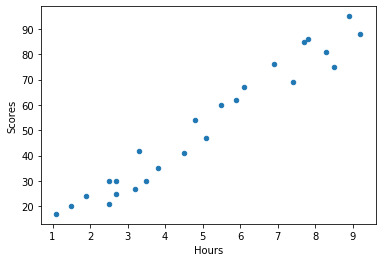

In [17]:
df.plot.scatter(x='Hours', y='Scores')

From the above graph, we can see a positive linear correlation. Hence, We can use linear regression for predictions.

### Training the model

In [5]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

We extract the feature column from the dataset and store it in X and the target column in Y.

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

We have split the data into two halves, namely for Training(70%) and testing(30%) the model. This is done to avoid Overfitting. So that the model doesn't just blindly memorize the entire dataset and hopefully finds patterns, using it on a new unseen dataset.

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("Model trained")

Model trained


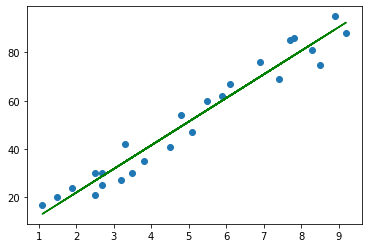

In [10]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line,color='g');
plt.show()

### Making predictions

We can now use the trained model and use it to predict on the test data.

In [12]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [13]:
y_pred = regressor.predict(X_test)

In [14]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


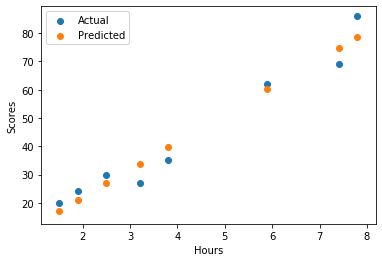

In [21]:
plt.scatter(X_test,y_test,label='Actual')
plt.scatter(X_test,y_pred,label='Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()


As you can see, the predicted value is somewhat close to the actual value. Hence, we can use it for prediction of unknown features.

Now. Let's predict the scores if the student studies for 9.25 hours.

In [108]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


Result: Predicted score around 92.9% if the student studies for 9.25 hrs.

### Prediction Error

In [103]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027652
